In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

In [4]:
with open('inference-analysis/sentence-encoder/modal-se-results.json', 'r') as f:
    modal_dict = json.load(f)
    
with open('inference-analysis/sentence-encoder/baseten-se-results.json', 'r') as f:
    baseten_dict = json.load(f)
      
with open('inference-analysis/sentence-encoder/hf-se-results.json', 'r') as f:
    hf_dict = json.load(f)
    
with open('inference-analysis/sentence-encoder/runpod-se-results.json', 'r') as f:
    runpod_dict = json.load(f) 
    
with open('inference-analysis/sentence-encoder/replicate-se-results.json', 'r') as f:
    replicate_dict = json.load(f) 

In [10]:
all_plats = {}

for plat_dicts in [modal_dict, baseten_dict, hf_dict, runpod_dict, replicate_dict]:
    for key, value in plat_dicts.items():
        all_plats[key] = value

In [12]:
#GET AVERAGE, MEDIAN AND P90 FOR EACH PLATFORM

results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

for plat, values in all_plats.items():
    results['platform'].append(plat)
    results['average'].append(np.mean(values))
    results['p50'].append(np.percentile(values, 50))
    results['p90'].append(np.percentile(values, 90))

In [13]:
df = pd.DataFrame(results)
df

,platform,average,p50,p90
0,modal,1.017449,0.856858,1.326196
1,baseten,0.468851,0.456427,0.537945
2,hf,0.200498,0.198401,0.219456
3,runpod,0.770669,0.757929,0.863128
4,replicate,0.081398,0.080327,0.088562


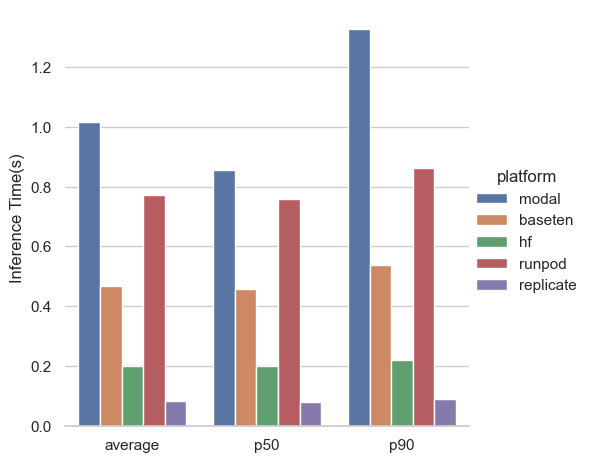

In [15]:
tdf = pd.melt(df, id_vars="platform", var_name="metric", value_name='value')
tdf

sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data=tdf,
    kind="bar",
    x="metric",
    y="value",
    hue="platform"
)
ax.despine(left=True)
ax.set_axis_labels("", "Inference Time(s)")
plt.show()

### Average Inference Time

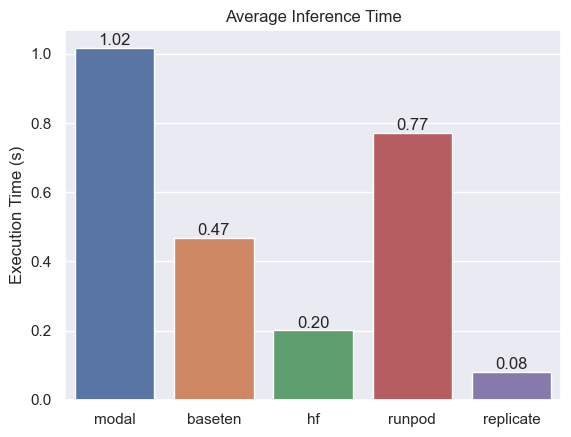

In [14]:
ax = sns.barplot(
    data=df,
    x="platform",
    y="average"
)

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')


plt.ylabel('Execution Time (s)')
plt.xlabel('')
plt.title('Average Inference Time')

plt.show()